In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# df=pd.read_csv("Live.csv")

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Intellipaat/Weekend_ML_Batch/Kmeans/Kmeans_assignment/Live.csv")


Mounted at /content/drive


In [4]:
df.head(10)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
5,246675545449582_1645650162218773,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0,NaN,NaN,NaN,NaN
6,246675545449582_1645564175560705,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3,NaN,NaN,NaN,NaN
7,246675545449582_1644824665634656,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1,NaN,NaN,NaN,NaN
8,246675545449582_1644655795651543,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0,NaN,NaN,NaN,NaN
9,246675545449582_1638788379571618,photo,4/11/2018 4:53,170,9,1,167,3,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
df.shape

(7050, 16)

In [6]:
df.isnull().sum()
# Ans 1) 4 columns contains null data i.e. missing values

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [7]:
df=df.drop(columns=["Column1","Column2","Column3","Column4"])

In [8]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [9]:
df.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [10]:
df.nunique() # to find unique values in a column of a dataframe

status_id           6997
status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
dtype: int64

In [11]:
print(df["status_id"].nunique()) # Ans 2) 6997 unique values in status_id column

6997


In [16]:
df[df["status_type"]=="video"].shape
# Ans 3) 2334  
# df.value_counts()

(2334, 12)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [18]:
df[df["status_published"]=="4/19/2018 22:26"]
# Ans 4) num_likes is 379

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
4592,725980084255106_850951205091326,photo,4/19/2018 22:26,383,5,6,379,2,2,0,0,0


In [20]:
df[(df["status_published"]=="7/15/2017 10:52") & (df["status_type"]=="video")]
# Ans 5) num_shares=167

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
6977,1050855161656896_1339706342771775,video,7/15/2017 10:52,253,4432,167,209,29,5,5,5,0


In [65]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [22]:
df=df.drop(columns=["status_id","status_published"])

In [23]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [24]:
X=df
y=df["status_type"]

In [25]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
X["status_type"]=le.fit_transform(X["status_type"])
y=le.transform(y)


In [ ]:
X["status_type"].nunique()

4

In [29]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [30]:
col=X.columns


In [31]:
col

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

In [33]:
# MinMax Scaling
from sklearn.preprocessing import MinMaxScaler
mm= MinMaxScaler()
X = mm.fit_transform(X)

In [35]:
type(X)

numpy.ndarray

In [36]:
X=pd.DataFrame(X,columns=[col])

In [39]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
status_type,7050.0,0.568322,0.314133,0.0,0.333333,0.333333,1.000000,1.0
num_reactions,7050.0,0.048857,0.098222,0.0,0.003609,0.012633,0.046497,1.0
num_comments,7050.0,0.010689,0.042384,0.0,0.000000,0.000191,0.001096,1.0
num_shares,7050.0,0.011689,0.038435,0.0,0.000000,0.000000,0.001168,1.0
num_likes,7050.0,0.045657,0.095429,0.0,0.003609,0.012314,0.039225,1.0
num_loves,7050.0,0.019374,0.060842,0.0,0.000000,0.000000,0.004566,1.0
num_wows,7050.0,0.004638,0.031366,0.0,0.000000,0.000000,0.000000,1.0
num_hahas,7050.0,0.004436,0.025205,0.0,0.000000,0.000000,0.000000,1.0
num_sads,7050.0,0.004778,0.031317,0.0,0.000000,0.000000,0.000000,1.0
num_angrys,7050.0,0.003651,0.023446,0.0,0.000000,0.000000,0.000000,1.0


In [41]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=2,init="k-means++",random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [42]:
kmeans.cluster_centers_

array([[3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03],
       [9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03]])

In [43]:
kmeans.inertia_   # Ans 16)  inter-cluster variance of the model is 237.757

237.75726404419646

In [46]:
import numpy as np
labels= kmeans.labels_
correct_labels = sum(y== labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))



Result: 63 out of 7050 samples were correctly labeled.


In [48]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.01


In [50]:
import warnings
warnings.filterwarnings("ignore")

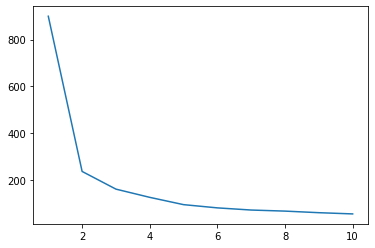

In [51]:
 # Ans 8 ) Elbow method is used to decide the optimal number of clusters in k-means clustering
from sklearn.cluster import KMeans
sse=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)
plt.plot(range(1,11),sse)
plt.show()

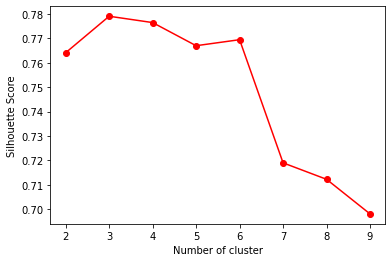

In [53]:
# Silhouette score
from sklearn.metrics import silhouette_score
# Empty dictionary to store the Silhouette score for each value of K
sc = {} 

# Iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that K 
for k in range(2, 10):
    kmeans=KMeans(n_clusters=k,init="k-means++",random_state=42).fit(X)
    
    labels = kmeans.predict(X)
    
    sc[k] = silhouette_score(X, labels)

# Elbow plot
plt.figure()

plt.plot(list(sc.keys()), list(sc.values()), 'ro-')

plt.xlabel("Number of cluster")

plt.ylabel("Silhouette Score")

plt.show()

In [57]:
kmeans = KMeans(n_clusters=4, random_state=42)

kmeans.fit(X)

labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 2266 out of 7050 samples were correctly labeled.
Accuracy score: 0.32


In [68]:
X=X.drop('KMeans_Labels',axis=1)

In [69]:
df['KMeans_Labels'] = kmeans.predict(X)
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,KMeans_Labels
0,3,529,512,262,432,92,3,1,1,0,3
1,1,150,0,0,150,0,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0,3
3,1,111,0,0,111,0,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0,0
7047,1,2,0,0,1,1,0,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0,0


In [70]:
df.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys', 'KMeans_Labels'],
      dtype='object')

In [71]:
data=df
data.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys', 'KMeans_Labels'],
      dtype='object')

In [72]:
# Calculating the mean and the median of the original data for each label
mean = data.groupby('KMeans_Labels').mean()

median = data.groupby('KMeans_Labels').median()

df_kmeans = pd.concat([mean, median], axis = 0)

df_kmeans.index = ['0 Mean', '1 Mean', '2 Mean','3 mean', '0 Median', '1 Median', '2 Median','3 median']

df_kmeans.T

,0 Mean,1 Mean,2 Mean,3 mean,0 Median,1 Median,2 Median,3 median
status_type,0.987633,3.000000,1.221498,2.882231,1.0,3.0,1.0,3.0
num_reactions,90.442047,1486.974874,1781.410423,167.992562,31.0,1347.0,1730.0,131.0
num_comments,13.620999,2261.301508,63.697068,436.356612,2.0,1293.0,19.0,16.0
num_shares,1.801891,453.291457,14.169381,74.451653,0.0,416.0,1.0,3.0
num_likes,88.242483,1302.628141,1774.260586,143.892975,30.0,1154.0,1710.0,104.0
num_loves,1.266489,151.904523,3.843648,21.944215,0.0,145.0,0.0,1.0
num_wows,0.554801,21.427136,3.016287,0.666116,0.0,4.0,0.0,0.0
num_hahas,0.182347,8.100503,0.231270,1.022727,0.0,4.0,0.0,0.0
num_sads,0.145490,1.633166,0.052117,0.321074,0.0,1.0,0.0,0.0
num_angrys,0.047284,1.261307,0.006515,0.144628,0.0,1.0,0.0,0.0


In [56]:
kmeans = KMeans(n_clusters=5, random_state=42)

kmeans.fit(X)

labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4300 out of 7050 samples were correctly labeled.
Accuracy score: 0.61


In [ ]:
#from sklearn.cluster import KMeans
# Ans 11) KMeans is the function used for KMeans

In [ ]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=42)
y_kmeans=kmeans.fit_predict(X)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
# print(y_kmeans)

In [ ]:
# Ans 6) a)  k means group similar elements

In [ ]:
# Ans 9 ) K-means is used for clustering

In [ ]:
# 

In [ ]:
df.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

In [75]:
colour=['red','blue','green','yellow','cyan'] 
n=0 
for i in range(0,len(colour)): 
 plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, c='red', label='Cluster 1')
 plt.scatter(k.cluster_centers_[:,0] ,k.cluster_centers_[:,1], color='black') 
 # Ans 7 ) a) gives an error


TypeError: ignored